# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how='outer')


# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [57]:
# Checking the number of mice.
mice_count = len(merged_df['Mouse ID'].unique())
print(f"There are {mice_count} mice getting treatment.")

There are 249 mice getting treatment.


In [58]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup_id = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dup_id


array(['g989'], dtype=object)

In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup = merged_df.loc[merged_df["Mouse ID"] == "g989"]
mice_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop(mice_dup.index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [61]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_df['Mouse ID'].unique())
print(f"There are {clean_mice_count} mice getting treatment after removing duplicated data.")

There are 248 mice getting treatment after removing duplicated data.


## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg_group = clean_df.groupby('Drug Regimen')
# Mean
mean = drug_reg_group['Tumor Volume (mm3)'].mean()
# Median
median = drug_reg_group['Tumor Volume (mm3)'].median()
# Variance 
var = drug_reg_group['Tumor Volume (mm3)'].var()
# Standard deviation
std = drug_reg_group['Tumor Volume (mm3)'].std()
# SEM
sem = drug_reg_group['Tumor Volume (mm3)'].sem()

tumor_stats_summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})
tumor_stats_summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats_aggset = drug_reg_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_stats_agg_df = tumor_stats_aggset.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})
tumor_stats_agg_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

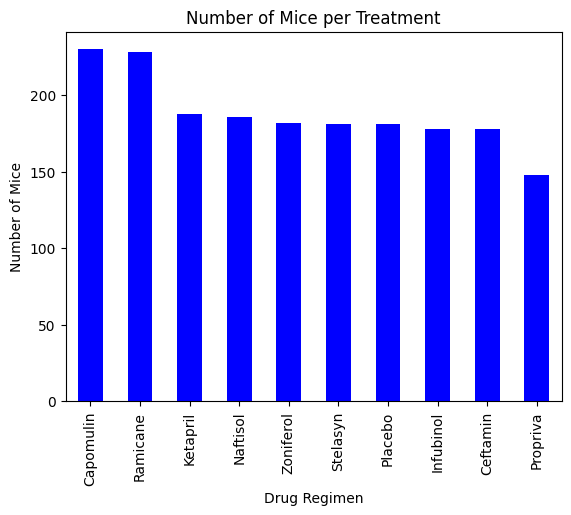

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_of_mice = clean_df["Drug Regimen"].value_counts()
plot_pandas = num_of_mice.plot(kind="bar",color='b') 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

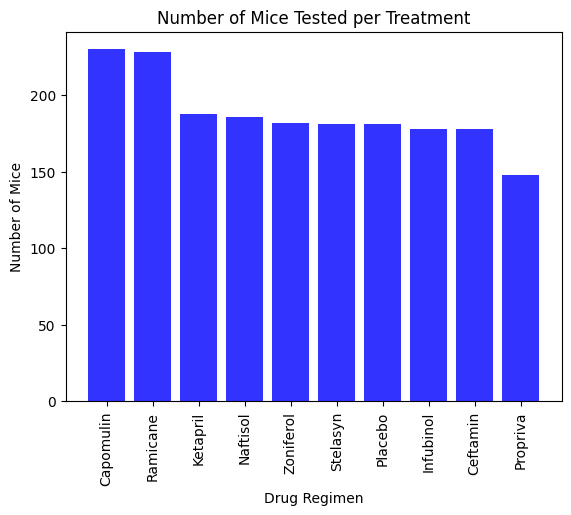

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = num_of_mice.index.values
y_axis = num_of_mice.values
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()


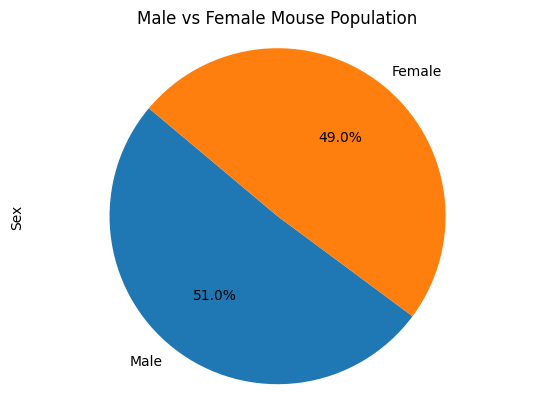

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Male vs Female Mouse Population")
gender_data.plot.pie(autopct= "%1.1f%%", startangle = 140)
plt.axis("equal")
plt.show()

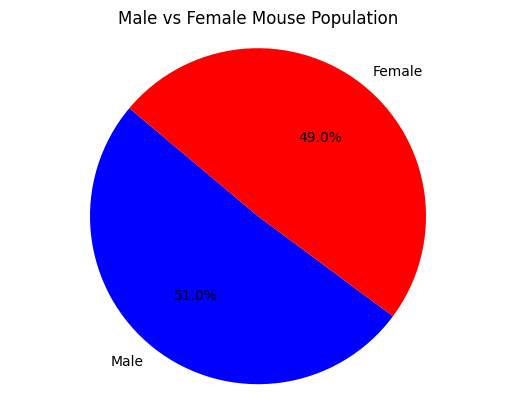

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = gender_data.index
py_bar_mice_sex = plt.pie(gender_data, labels=gender_data.index, autopct="%1.1f%%", colors=['blue','red'], startangle=140)
plt.axis("equal")
plt.title("Male vs Female Mouse Population")
plt.show()

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, clean_df, on = ["Mouse ID","Timepoint"])
tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [69]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol = []
ram_tumor_vol = []
inf_tumor_vol = []
cef_tumor_vol = []

for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        cap_tumor_vol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        ram_tumor_vol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        inf_tumor_vol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        cef_tumor_vol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])

tumor_vol = [cap_tumor_vol, ram_tumor_vol, inf_tumor_vol, cef_tumor_vol]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volume

    # add subset 
    
    # Determine outliers using upper and lower bounds
    for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")



Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

Ceftamin:
Th

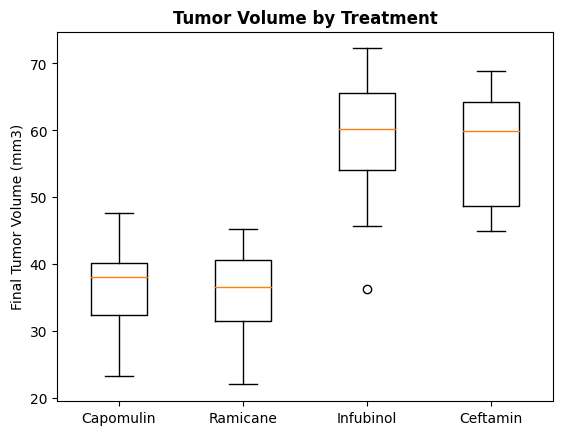

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol)
ax1.set_title("Tumor Volume by Treatment", fontweight = 'bold')
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

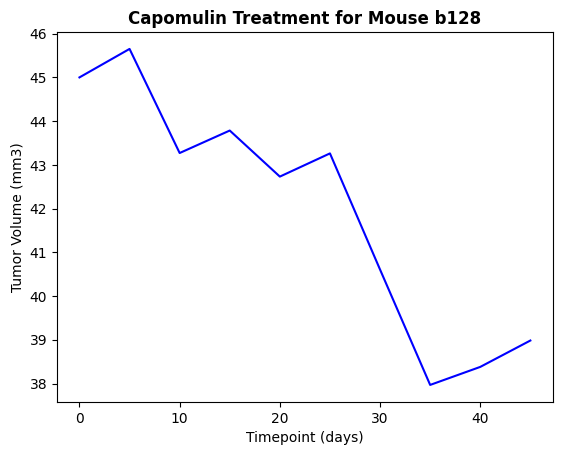

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"]
single_mouse = clean_df.loc[clean_df["Mouse ID"]=="b128"]
plt.plot(single_mouse["Timepoint"],single_mouse["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment for Mouse b128", fontweight = 'bold')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

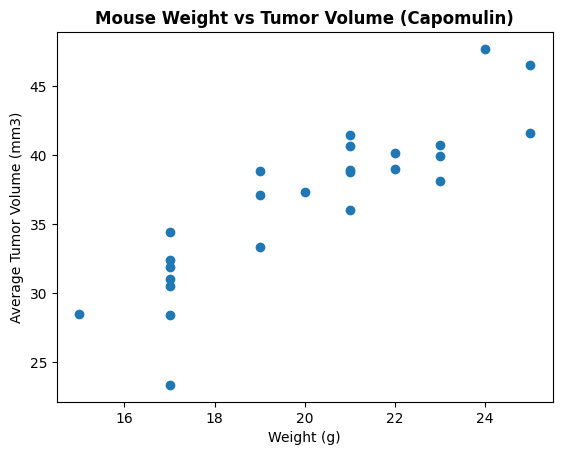

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_group = cap_df.groupby('Mouse ID').mean()
mice_weight = cap_group['Weight (g)']
mice_tumor = cap_group['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(mice_weight, mice_tumor)

# Set x/y label, title
plt.title('Mouse Weight vs Tumor Volume (Capomulin)', fontweight = 'bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88.


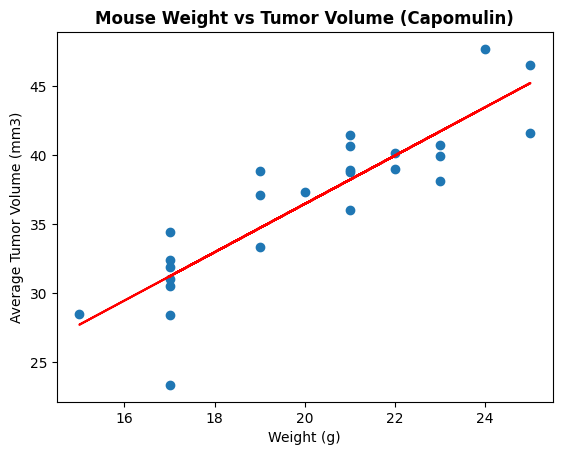

In [73]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mice_weight.astype(float)
correlation = st.pearsonr(mouse_weight, mice_tumor)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, mice_tumor)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, mice_tumor)
plt.plot(mouse_weight,regress_values,"r-")
plt.title('Mouse Weight vs Tumor Volume (Capomulin)', fontweight = 'bold')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()